<h2> Nauczanie maszynowe/Ćwiczenia1

Uczenie maszynowe można podzielić na:

- Uczenie nadzorowane (z nauczycielem) - na podstawie danych $(x_i, y_i)$ uczymy się funkcji $f_{\theta}$, takiej że $y_i \approx f_{\theta}(x_i)$
- Uczenie nienadzorowane (bez nauczyciela) - na podstawie danych $(x_i)$ uczymy się $p(x;\theta) = \sum_z p(x|z;\theta)p(z;\theta)$
- Uczenie ze wzmocnieniem - uczymy się polityki $\pi(a|x)$


Będziemy zajmować się przede wszystkim  uczeniem nadzorowanym oraz nienadzorowanym. Aby wyznaczyć parametr $\theta$ rozważmy różnego typu funkcje kosztu.

W uczeniu nadzorowanym najczęsciej interesuje nas zagadnienie regresji lub klasyfikacji.

Modele dyskryminatywne a generatywne

In [418]:
from IPython import display


In [333]:
import numpy as np
import matplotlib.pyplot as plt

In [419]:
from sklearn.datasets import load_boston
boston_data = load_boston()


C:\Users\Maryla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset 

In [335]:
d = boston_data['data']
d2 = d[:, [2,5]] #wyciągamy tylko 2 cechy: INDUS, RM
target = boston_data['target']

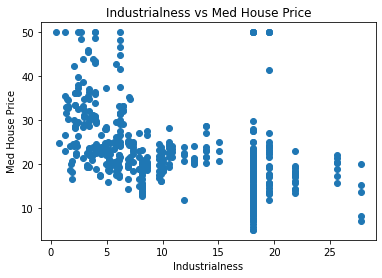

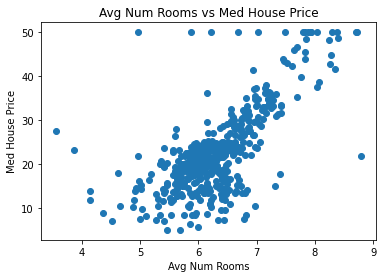

In [336]:
plt.title('Industrialness vs Med House Price')
plt.scatter(d2[:, 0], target)
plt.xlabel('Industrialness')
plt.ylabel('Med House Price')
plt.show()

plt.title('Avg Num Rooms vs Med House Price')
plt.scatter(d2[:, 1], target)
plt.xlabel('Avg Num Rooms')
plt.ylabel('Med House Price')
plt.show()

Funkcja kosztu mierzy średnią różnicę pomiędzy przewidywaniem a rzeczywistą wartością. Istnieje wiele funkcji tego typu, jedna z najpopularniejszych ma postać:

<center>
$LF(y,t) = \frac{1}{2N}\sum_{i}(y^{i}-t^{i})^2$
    
 

W przypadku regresji liniowej 2 zmiennych:
    
<center>
$LF(y,t) = \frac{1}{2N}\sum_{i}(w_1x_{1}^{i}+w_2x_{2}^{i}+w_0-t^{i})^2$

In [337]:
def loss_function(w1, w2, w0, X, t):

    loss = 0 
    for i in range(len(t)):
        y_i = w1* X[i, 0] + w2 *X[i, 1] + w0 * X[i, 1]
        t_i = t[i]
        loss += 0.5 * (y_i - t_i)**2 
    return loss / len(t)


In [338]:
loss_function(1, 6, -3, d2, target)

107.07670691996049

In [339]:
#przykladowe wywolanie
loss_function(3, 8, -1, d2, target)

1791.429890279644

In [340]:
#przykladowe wywolanie
loss_function(-0.5, 8, -23, d2, target) #lepiej

7628.711470602762

<h4> Zadanie1: Uzupełnij definicję powyższej funkcji.

Często na początku nie mamy informacji o tym jakie powinny być parametry modelu; możemy zacząć od losowych wartości. Pojawia się więc pytanie jak je aktualizować aby wartości funkcji kosztu były coraz mniejsze? Jedno z najpopularnieszych podejść (i stanowiące podstawę do innych algorytmów) jest opartę o metodę spadku gradientu (Gradient Descent). Liczymy pochodną funkcji kosztu po rozważanych parametrach a następnie aktualizujemu je wg:

<center> 
$w_{new} = w_{old} - \eta \cdot \frac{d LF}{dw}$

In [341]:
def update_weigths(w1, w2, w0, X, t, eta):
    loss = 0 
    loss1 = 0
    loss2 = 0
    for i in range(len(t)):
        y_i = w1* X[i, 0] + w2 *X[i, 1] + w0 * X[i, 1]
        t_i = t[i]
        loss += 0.5*2*X[i, 0]*(w2 * X[i, 1] - t[i] + w0 + w1 * X[i, 0])
        loss1 += 0.5*2*X[i, 1]*(X[i, 1]*w2 - t[i] + w0 + X[i, 0]*w1)
        loss2 += 0.5*2*(X[i, 1]*w2 - t[i] + w0 + X[i, 0]*w1)
        w11 = w1 - eta*loss/len(t)
        w21 = w2 - eta*loss1/len(t)
        w01 = w0 - eta*loss2/len(t)
        w_new = [w11, w21, w01]
    return w_new
    

In [342]:
#przykladowe wywolanie
update_weigths(3, 8, -1, d2, target, 0.001)

[2.1737704910276685, 7.628145982577075, -1.060154604743083]

<h4> Zadanie2: Uzupełnij definicję powyższej funkcji.

<h4> Zadanie3: Celem jest zbudowanie modelu regresji liniowej przeiwdującej $target$ w oparciu o $d2$. Wystartuj z początkowych parametrów 1, 1 oraz 1. Przyjmując $\eta=0.001$ wykonaj 1000 aktualizacji tych parametrów na podstawie metody gradientu. Narysuj zależność funkcji kosztu od numeru iteracji. Wykonaj analogiczne obliczenia dla $\eta=0.01$ oraz $\eta=0.00001$. Skomentuj otrzymane wyniki.

In [343]:
def regresion(w1, w2, w0, X, t, eta, epoch):
    LOSS = [];
    for i in range(epoch):
        LOSS.append(loss_function(w1, w2, w0, X, t))
        [w1, w2, w0] = update_weigths(w1, w2, w0, X, t, eta)
 
    return LOSS
    pass

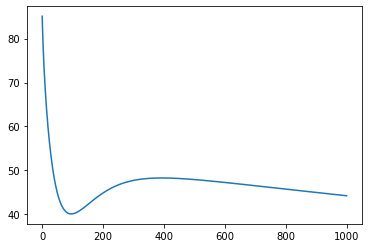

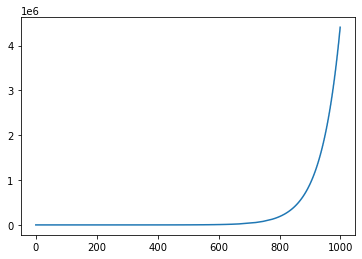

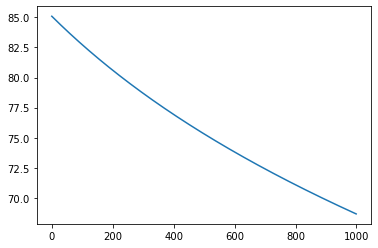

In [344]:
Y = regresion(1,1,1,d2,target, 0.001, 1000)
X = range(len(Y))
plt.plot(X,Y)
plt.show()

Y1 = regresion(1,1,1,d2,target, 0.01, 1000)
X1 = range(len(Y1))
plt.plot(X1,Y1)
plt.show()

Y2 = regresion(1,1,1,d2,target, 0.00001, 1000)
X2 = range(len(Y2))
plt.plot(X2,Y2)
plt.show()


Przy learning rate 0,01 funkcja wypada z minimum, dla 0,00001 funkcja zbyt wolno osiąga minimum. Przy lerning rate 0,001 osiągane jest minimum ale tak jak dla 0,01 funkcja wypada z minimum. Moim zdaniem najlepsze learning rate byłoby 0,0001 wtedy funkcja osiąga minimum i w nim zostaje. 

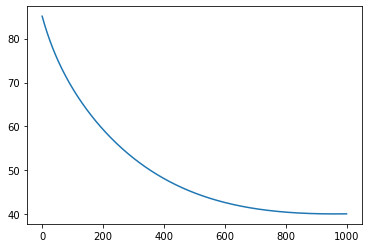

In [345]:
Y3 = regresion(1,1,1,d2,target, 0.0001, 1000)
X3 = range(len(Y))
plt.plot(X3,Y3)
plt.show()

<h4> Zadanie4: Zazwyczaj nie wiemy z góry ile razy należy zmodyfikować wagi - kiedy dalsza aktualizacja nie przynosi efektu. Jednym z rozwiązań tego problemu jest sprawdzenie o jaki procent zmieniają sie aktualne wagi. Przyjmijmy, że jeżeli zmiana funkcji kosztu jest mniejsza niż 0,1% to przerywamy działanie. Ile kroków należałoby wykonać aby zrealizować poprzednie zadanie?

In [347]:
def LOSS_stop(w1, w2, w0, X, t, eta, iter):
    LOSS = []
    d = 1
    while d > 0.001:
        LOSS.append(loss_function(w1, w2, w0, X, t))
        [w1, w2, w0] = update_weigths(w1, w2, w0, X, t, eta)
        if len(LOSS) > 2:
            d = 1 - LOSS[-1]/LOSS[-2]
    return LOSS

In [348]:
l_iter = LOSS_stop(1, 1, 1, d2, target, 0.001, 1000)
print(f"Aby zrealizować poprzednie zadanie należy wykonać {len(l_iter)} kroków")

Aby zrealizować poprzednie zadanie należy wykonać 85 kroków


Oczywiście w Pythonie istnieje implementacja metody regresji liniowej

In [349]:
from sklearn.linear_model import LinearRegression

In [350]:
model = LinearRegression()
model.fit(d2, target);

In [351]:
model.coef_ #wspolczynnki dla zmiennych

array([-0.33471389,  7.82205511])

In [352]:
model.intercept_ #wyraz wolny

-22.89831572922508

<h4> Zadanie5: Porównaj te parametry z otrzymanymi z Zadania3. Z czego może wynikać ta różnica?

In [353]:
r_sq = model.score(d2, target) #R2 modelu
print(r_sq) 

0.5362984005856312


In [354]:
y_pred = model.predict(d2) #przewidywane y
print(y_pred[:5])

[27.75850755 24.96067296 30.93672306 31.11074967 32.27623588]


Takie różnice mogą wynikać z innej liczby iteracji albo innej wartości learning rate 

<h3> Co jeżeli dane nie są liniowe?

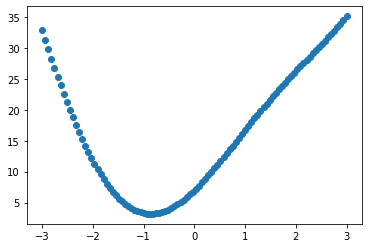

In [211]:
def non_linear(x):
    return 3*x**2+8*np.sin(x)+7

x = np.linspace(-3,3,100) #100 liczb z przedzialu [-3,3]
y = non_linear(x)

plt.scatter(x,y)
plt.show()

Załóżmy, że dane są tylko $x$ oraz $y$ oraz znana jest zależność między nimi, tzn $y=ax^2+b \sin x +c$, przy czym $a,b,c$ są nieznane.

In [420]:
x1 = x**2
x2 = np.sin(x)
X = np.vstack((x1, x2)).T #lącze je w tablice 2D
target = y

In [423]:
w1 = 1
w2 = 1
w0 = 1

l = []

for i in range(10000):
    l.append(loss_function(w1, w2, w0, X, target))
    w1, w2, w0 = update_weigths(w1, w2, w0, X, target, 0.001)

C:\Users\Maryla\AppData\Local\Temp\ipykernel_4476\3965396616.py:7: RuntimeWarning: overflow encountered in double_scalars
  loss += 0.5 * (y_i - t_i)**2
C:\Users\Maryla\AppData\Local\Temp\ipykernel_4476\2211077041.py:8: RuntimeWarning: overflow encountered in double_scalars
  loss += 0.5*2*X[i, 0]*(w2 * X[i, 1] - t[i] + w0 + w1 * X[i, 0])
C:\Users\Maryla\AppData\Local\Temp\ipykernel_4476\2211077041.py:11: RuntimeWarning: invalid value encountered in double_scalars
  w11 = w1 - eta*loss/len(t)
C:\Users\Maryla\AppData\Local\Temp\ipykernel_4476\2211077041.py:9: RuntimeWarning: invalid value encountered in double_scalars
  loss1 += 0.5*2*X[i, 1]*(X[i, 1]*w2 - t[i] + w0 + X[i, 0]*w1)


In [424]:
w1, w2, w0

(nan, nan, nan)

Wniosek: Powyższa metoda może być stosowana także do nieliniowych funkcji.

<h3> Parametry modelu a hiperparametry

- parametry modelu ($w_1, w_2, w_0$)
- hiperparametry (np. $\eta$), są zewnętrzne wobec modelu

Dane zazwyczaj dzielimy na 2 lub 3 grupy - zbiór treningowy, zbiór walidacyjny oraz zbiór testowy.

Ogólnie:
- Na zbiorze treningowym uczymy parametrów modelu za pomocą metody spadku gradientu.
- Z użyciem zbioru walidacyjnego wybieramy najbardziej optymalne hiperparametry.
- Sprawdzamy wybrany zbiór parametrów i hiperparametrów na zbiorze testowym

<h4> Zadanie6: Rozważ jeszcze raz dane $d2/target$. 
    
- Podziel je na trzy podzbiory - treningowy (60%), walidacyjny (20%) oraz testowy (20%); najlepiej zdefiniuj odpowiednią funkcję. 
- Przetestuj różne wartości parametrów $\eta$ na zbiorze walidacyjnym, na tej podstawie wybierz jeden, który użyjesz do wytrenowania parametrów modelu na zbiórze treningowym. 
- Na końcu wyznacz wartość funkcji kosztu na zbiorze testowym. Skomentuj otrzymane wyniki.

In [389]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model, metrics

X_train, X_test, y_train, y_test  = train_test_split(d2, target, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)


Definuje funkcję która zwraca wagi a nie wartości funkcji kosztu 

In [394]:
def regresion1(w1, w2, w0, X, t, eta, epoch):
    LOSS = [];
    for i in range(epoch):
        LOSS.append(loss_function(w1, w2, w0, X, t))
        [w1, w2, w0] = update_weigths(w1, w2, w0, X, t, eta)
 
    return [w1, w2, w0] 
    pass

Jak już wyżej pisałam optymalnym learning rate będzie 0,001 tak wiec dla takiego będę oliczać nowe wagi 

In [411]:
[w1, w2, w0] = regresion1(1, 1, 1, X_val, y_val, 0.001, 1000)

In [417]:
print(f"Wartość funkcji kosztu po 1000 iteracjach przy eta = 0,001 wynosi {loss_function(w1,w2,w0,X_train, y_train)}")

Wartość funkcji kosztu po 1000 iteracjach przy eta = 0,001 wynosi 40.95921497044697


<h3> Uzupełnienie

In [217]:
#podstawowe statystyki

x = np.array([11,12,13,14,15,16,17,18,19,20])
print(np.mean(x), np.median(x), np.std(x), np.var(x), np.percentile(x, 90))

15.5 15.5 2.8722813232690143 8.25 19.1


In [218]:
#liczby losowe

print(np.random.uniform(0, 5, 10))
print()
print(np.random.normal(0, 5, 10))

[4.06670611 2.51031511 3.12514226 4.18980164 0.8531904  1.51871925
 3.99666119 3.94656866 1.70428024 1.08312401]

[ 3.70668401  0.70942802 -2.7994656  -1.98528636  5.52965493 -1.68510734
  0.54843174 -0.96240266 -0.8429177   6.25268757]


In [219]:
#pandas i normalizacja (x-mean)/sd

import pandas as pd
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X = pd.DataFrame({"a":[1,2,6], "b":[0,5,-5]})
print(X)
print()
scaledX = scale.fit_transform(X)
print(scaledX)

   a  b
0  1  0
1  2  5
2  6 -5

[[-0.9258201   0.        ]
 [-0.46291005  1.22474487]
 [ 1.38873015 -1.22474487]]


In [220]:
#porownaj z wynikiem wyzej
v = np.array([1,2,6])
print((v - np.mean(v))/np.std(v))

[-0.9258201  -0.46291005  1.38873015]


In [221]:
#podzial tekstu na zbior testowy i treningowy
from sklearn.model_selection import train_test_split

X, y = np.arange(10).reshape((5, 2)), range(5)
print(X)
print()
print(list(y))
print()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

print(X_train)
print()
print(X_test)
print()
print(y_train)
print()
print(y_test)

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]

[0, 1, 2, 3, 4]

[[4 5]
 [0 1]
 [6 7]]

[[2 3]
 [8 9]]

[2, 0, 3]

[1, 4]
